In [1]:
import itertools
# Used to create combinations

# Tossing 3 Coins
# Event : Atleast 2 Heads

In [2]:
coin_outcomes = ['H', 'T']

In [3]:
# Total outcomes
print(list(itertools.product(coin_outcomes, repeat=3)))
print(len(list(itertools.product(coin_outcomes, repeat=3))))

# 'H', 'T'
# 'T', 'H'
# Order matters on the above case

[('H', 'H', 'H'), ('H', 'H', 'T'), ('H', 'T', 'H'), ('H', 'T', 'T'), ('T', 'H', 'H'), ('T', 'H', 'T'), ('T', 'T', 'H'), ('T', 'T', 'T')]
8


In [4]:
('H', 'H', 'H').count('T')

0

In [5]:
('H', 'H', 'H').count('H')

3

In [6]:
favorable_outcomes = []
all_outcomes = list(itertools.product(coin_outcomes, repeat=3))
for outcome in all_outcomes:
    if outcome.count('H') >=2:
        favorable_outcomes.append(outcome)

print(favorable_outcomes)

[('H', 'H', 'H'), ('H', 'H', 'T'), ('H', 'T', 'H'), ('T', 'H', 'H')]


In [7]:
len(favorable_outcomes) / len(all_outcomes)

0.5

# Drawing 2 cards (without replacement)

# Event : Both Ace

In [8]:
num_aces = 4
total_cards = 52

prob_first_ace = num_aces / total_cards

num_aces_after_first = num_aces - 1
total_cards_after_first = total_cards - 1

prob_second_ace = num_aces_after_first / total_cards_after_first

overall_prob = prob_first_ace * prob_second_ace

print(overall_prob)

0.004524886877828055


In [9]:
from fractions import Fraction

In [10]:
fraction_prob = Fraction(overall_prob).limit_denominator(1000)
print(fraction_prob)

1/221


# Simulate Prob

Drawing 2 cards (without replacement)

Event : Both Ace -->

In [11]:
import random

In [12]:
def simulate_2_card_with_replacemnt(num_of_simulation):
    successful_draw = 0

    for _ in range(num_of_simulation):
        deck = ['Ace'] * 4 + ['Other'] * 48
        first_card_index = random.randrange(len(deck)) # 0 to 51
        first_card = deck.pop(first_card_index)
        #a = [ 1,2,3,4]
        # a.pop(0) --> 1
        # a = [2,3,4]
        if first_card == 'Ace':
            second_card_index = random.randrange(len(deck)) # 0 to 51
            second_card = deck.pop(second_card_index)

            if second_card == 'Ace':
                successful_draw+=1

    return successful_draw / num_of_simulation

In [13]:
print(simulate_2_card_with_replacemnt(100000000))

0.00453678


In [14]:
# P.S : probability of sum = 7 with two dice

dice = [1,2,3,4,5,6]

sample_space = list(itertools.product(dice, repeat=2))

favourable = [outcome for outcome in sample_space if sum(outcome)==7]

print(Fraction(len(favourable) / len(sample_space)).limit_denominator(10))

1/6


# MEASURE OF DISPERSION

# PMF & PDF

In [15]:
def pmf_dice(face_of_dice):
    if face_of_dice in [1,2,3,4,5,6]:
        return 1/6
    else:
        return 0

In [16]:
pmf_dice(1)

0.16666666666666666

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [20]:
bins[:-1]

[150, 155, 160, 165, 170, 175]

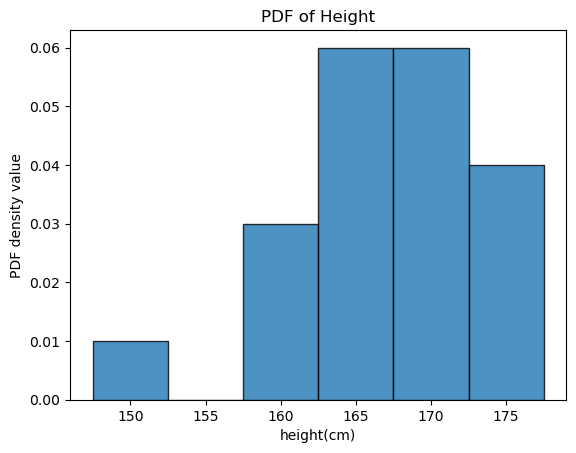

In [19]:
bins = [150, 155, 160, 165, 170, 175, 180]
pdf_values = [0.01, 0, 0.03, 0.06, 0.06, 0.04]

plt.bar(bins[:-1], pdf_values, width=5, edgecolor='black', alpha=0.8)

plt.title("PDF of Height")
plt.xlabel("height(cm)")
plt.ylabel("PDF density value")
plt.show()

In [21]:
# Data
heights = [162, 168, 171, 154, 175, 178, 165, 169, 172, 160, 
           167, 173, 170, 176, 164, 179, 166, 170, 174, 168]

In [22]:
mean = np.mean(heights)
std = np.std(heights)
print(mean)
print(std)

169.05
6.053717865906869


# CDF

In [23]:
# CDF Calculation and Plot
x = np.linspace(150, 190, 100)
# 150 mininum
# 190 is my largest values
# 100 number of data

print(x)
print(len(x))

[150.         150.4040404  150.80808081 151.21212121 151.61616162
 152.02020202 152.42424242 152.82828283 153.23232323 153.63636364
 154.04040404 154.44444444 154.84848485 155.25252525 155.65656566
 156.06060606 156.46464646 156.86868687 157.27272727 157.67676768
 158.08080808 158.48484848 158.88888889 159.29292929 159.6969697
 160.1010101  160.50505051 160.90909091 161.31313131 161.71717172
 162.12121212 162.52525253 162.92929293 163.33333333 163.73737374
 164.14141414 164.54545455 164.94949495 165.35353535 165.75757576
 166.16161616 166.56565657 166.96969697 167.37373737 167.77777778
 168.18181818 168.58585859 168.98989899 169.39393939 169.7979798
 170.2020202  170.60606061 171.01010101 171.41414141 171.81818182
 172.22222222 172.62626263 173.03030303 173.43434343 173.83838384
 174.24242424 174.64646465 175.05050505 175.45454545 175.85858586
 176.26262626 176.66666667 177.07070707 177.47474747 177.87878788
 178.28282828 178.68686869 179.09090909 179.49494949 179.8989899
 180.3030303 

In [24]:
cdf = norm.cdf(x, mean, std)
# PROB = AREA = PDF_value * bin_width

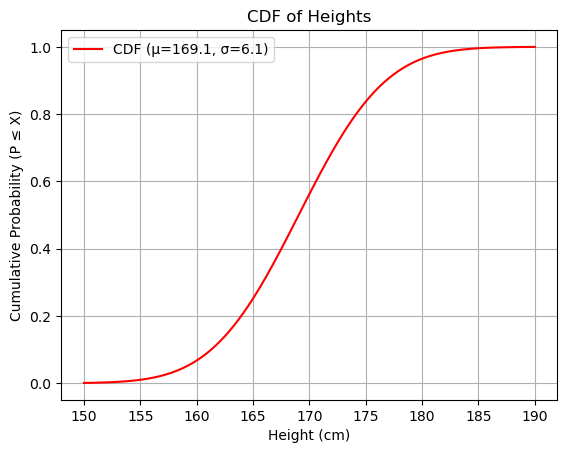

In [25]:
plt.plot(x, cdf, 'r-', label=f"CDF (μ={mean:.1f}, σ={std:.1f})")
plt.title("CDF of Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Cumulative Probability (P ≤ X)")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
p_165_170 = norm.cdf(170, mean, std) - norm.cdf(165, mean, std)
print(f"P(165<=X<=170) is : {p_165_170}")

P(165<=X<=170) is : 0.3106049115389782


In [27]:
p_165_170 = norm.cdf(172.001, mean, std) - norm.cdf(161.00003, mean, std)
print(f"P(165<=X<=170) is : {p_165_170}")

P(165<=X<=170) is : 0.5952377341238007
